# Setup

In [1]:
import torch
from torchvision import datasets, transforms 
from sklearn.metrics import classification_report

In [2]:
%run setup.ipynb 

# Training with augmentation

Now we've trained our model and assessed its performance on the feeder data... it's not the worst, but let's see if we can't make it a bit stronger by adding augmentations.

## Augmentation round 1

First, just gonna mess up the pictures a little - no sciency arguments for it other than intuitively trying to capture that the feeder images are more grainy and the birds are not always perfectly posed (hence the crop).

In [ ]:
# Defining the transforms including augmentations (and also the basic ToTensor and normalisation)
preprocess_with_augmentation1 = transforms.Compose([
    transforms.RandomRotation(degrees=10),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomResizedCrop(size=224,scale=(0.3,1)), # lowerbound the scale at 30 % of og img to not get too small portions
    
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Datasets and loaders with augmentations added 
dataset_train_aug1 = datasets.ImageFolder(PATH_TRAIN, preprocess_with_augmentation1)
dataloader_train_aug1 = torch.utils.data.DataLoader(dataset_train_aug1, batch_size=8, shuffle=True, num_workers=4)

In [ ]:
# looking at the augmentations..
inputs, classes = next(iter(dataloader_train_aug1))
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_labels[x] for x in classes])

Load in a fresh ResNet50 that's prepped for transfer learning

In [ ]:
# load "clean" resnet50
untrained_model_aug1 = load_and_prep_resnet50()
optimizer = get_optimizer(untrained_model_aug1) # FIXME does this change?

### Training
First with the frozen layers, then unfreeze for finetuning

In [ ]:
freezetrained_model_aug1, freeze_aug1_info = train_model(model=untrained_model_aug1, optimizer=optimizer, num_epoch=40, train=dataloader_train_aug1)

In [ ]:
unfreeze_layers(freezetrained_model_aug1)
model_aug1, model_aug1_info = train_model(model=freezetrained_model_aug1, optimizer=optimizer, num_epoch=40, train=dataloader_train_aug1)

In [ ]:
torch.save({"aug1": model_aug1.state_dict(), "aug1_info": model_aug1_info, "freeze_aug1_info": freeze_aug1_info},"aug1Model_40.tar")

### Round 1 results

In [ ]:
visualize_model(model_aug1, dataloader_tiny_val, class_labels, device)

In [ ]:
plot_accuracies(model_aug1_info["train_loss"], model_aug1_info["val_loss"], ["Train", "Val"])

In [ ]:
plot_accuracies(model_aug1_info["train_acc"], model_aug1_info["val_acc"], ["Train", "Val"])

In [ ]:
truel, predl = makeAll(dataloader_test, model_aug1, device)
plot_confusion_matrix(truel, predl, class_labels, normalize=True)
print("Accuracy", (np.sum(predl==truel)/predl.size * 100))


In [ ]:
print(classification_report(truel, predl, target_names=class_labels))

### On feeder

In [ ]:
truel, predl = makeAll(dataloader_feeder, model_aug1, device)
plot_confusion_matrix(truel, predl, class_labels, normalize=True)
print("Accuracy", (np.sum(predl==truel)/predl.size * 100))


## Augmentation Round 2

Add blur and colorjitter

In [3]:
# Defining the transforms including augmentations (and also the basic ToTensor and normalisation)
preprocess_with_augmentation2 = transforms.Compose([
    transforms.ColorJitter(brightness=0.1), # Added
    transforms.GaussianBlur(kernel_size=(5,5), sigma=(7, 9)), # Added
    transforms.RandomRotation(degrees=10),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomResizedCrop(size=224,scale=(0.3,1)), # lowerbound the scale at 30 % of og img to not get too small portions
    
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Datasets and loaders with augmentations added 
dataset_train_aug2 = datasets.ImageFolder(PATH_TRAIN, preprocess_with_augmentation2)
dataloader_train_aug2 = torch.utils.data.DataLoader(dataset_train_aug2, batch_size=8, shuffle=True, num_workers=4)

Load in a fresh ResNet50 that's prepped for transfer learning

In [4]:
# load "clean" resnet50
untrained_model_aug2 = load_and_prep_resnet50()
optimizer = get_optimizer(untrained_model_aug2) 


### Training
First with the frozen layers, then unfreeze for finetuning

In [5]:
freezetrained_model_aug2, freeze_aug2_info = train_model(model=untrained_model_aug2, optimizer=optimizer, num_epoch=40, train=dataloader_train_aug2) 

Epoch 1/40
----------
Train Loss: 1.8430 Acc: 0.3257
Val Loss: 1.8211 Acc: 0.3173
Epoch time 1m 10s
----------

Epoch 2/40
----------
Train Loss: 1.6038 Acc: 0.5928
Val Loss: 1.6930 Acc: 0.4904
Epoch time 1m 9s
----------

Epoch 3/40
----------
Train Loss: 1.3883 Acc: 0.6731
Val Loss: 1.5667 Acc: 0.5192
Epoch time 1m 9s
----------

Epoch 4/40
----------
Train Loss: 1.2874 Acc: 0.7054
Val Loss: 1.4907 Acc: 0.6058
Epoch time 1m 10s
----------

Epoch 5/40
----------
Train Loss: 1.1941 Acc: 0.7174
Val Loss: 1.5143 Acc: 0.5769
Epoch time 1m 9s
----------

Epoch 6/40
----------
Train Loss: 1.0978 Acc: 0.7569
Val Loss: 1.3338 Acc: 0.6827
Epoch time 1m 10s
----------

Epoch 7/40
----------
Train Loss: 1.0303 Acc: 0.7341
Val Loss: 1.3015 Acc: 0.6538
Epoch time 1m 9s
----------

Epoch 8/40
----------
Train Loss: 0.9809 Acc: 0.7641
Val Loss: 1.2616 Acc: 0.7019
Epoch time 1m 10s
----------

Epoch 9/40
----------
Train Loss: 0.9443 Acc: 0.7653
Val Loss: 1.2473 Acc: 0.7212
Epoch time 1m 9s
---------

In [6]:
unfreeze_layers(freezetrained_model_aug2)
model_aug2, model_aug2_info = train_model(model=freezetrained_model_aug2, optimizer=optimizer, num_epoch=40, train=dataloader_train_aug2)

Epoch 1/40
----------
Train Loss: 0.4903 Acc: 0.8335
Val Loss: 0.4126 Acc: 0.8942
Epoch time 1m 52s
----------

Epoch 2/40
----------
Train Loss: 0.3379 Acc: 0.8946
Val Loss: 0.2799 Acc: 0.9327
Epoch time 1m 51s
----------

Epoch 3/40
----------
Train Loss: 0.2828 Acc: 0.8982
Val Loss: 0.2735 Acc: 0.9231
Epoch time 1m 51s
----------

Epoch 4/40
----------
Train Loss: 0.2369 Acc: 0.9281
Val Loss: 0.2789 Acc: 0.9327
Epoch time 1m 51s
----------

Epoch 5/40
----------
Train Loss: 0.1552 Acc: 0.9521
Val Loss: 0.2957 Acc: 0.9231
Epoch time 1m 50s
----------

Epoch 6/40
----------
Train Loss: 0.1337 Acc: 0.9545
Val Loss: 0.2580 Acc: 0.9327
Epoch time 1m 51s
----------

Epoch 7/40
----------
Train Loss: 0.1701 Acc: 0.9281
Val Loss: 0.2358 Acc: 0.9135
Epoch time 1m 50s
----------

Epoch 8/40
----------
Train Loss: 0.1303 Acc: 0.9605
Val Loss: 0.2661 Acc: 0.9327
Epoch time 1m 51s
----------

Epoch 9/40
----------
Train Loss: 0.1285 Acc: 0.9521
Val Loss: 0.2648 Acc: 0.9038
Epoch time 1m 51s
----

In [7]:
torch.save({"aug2": model_aug2.state_dict(), "aug2_info": model_aug2_info, "freeze_aug1_info": freeze_aug2_info},"aug2Model_40.tar")

### Round 2 Results

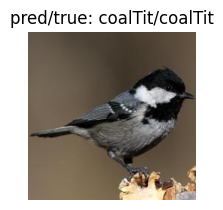

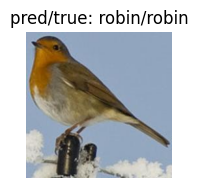

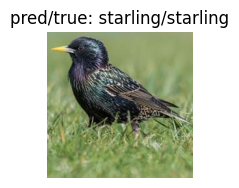

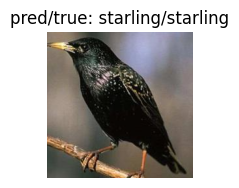

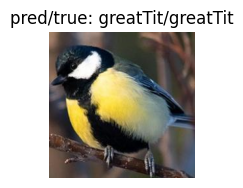

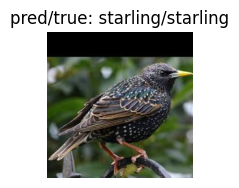

In [8]:
visualize_model(model_aug2, dataloader_tiny_val, class_labels, device)

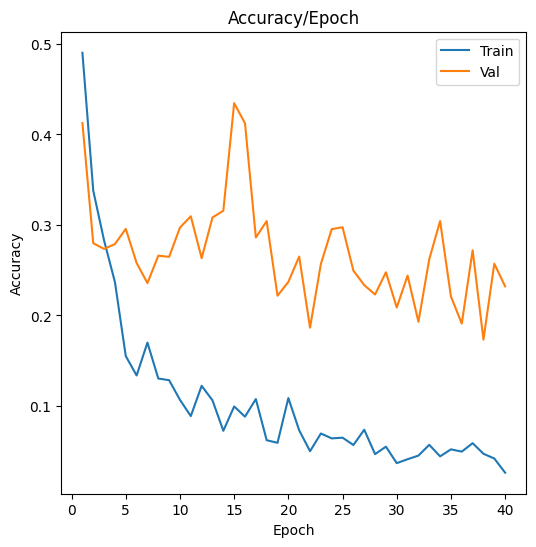

In [9]:
plot_accuracies(model_aug2_info["train_loss"], model_aug2_info["val_loss"], ["Train", "Val"])

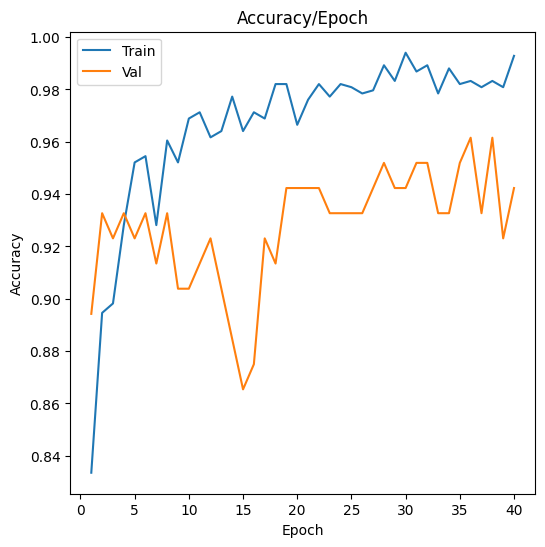

In [10]:
plot_accuracies(model_aug2_info["train_acc"], model_aug2_info["val_acc"], ["Train", "Val"])

[[15  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0]
 [ 0  0 14  0  0  0  1]
 [ 0  1  0 14  0  0  0]
 [ 0  0  0  0 15  0  0]
 [ 0  0  0  0  0 15  0]
 [ 0  0  0  0  0  0 15]]
Accuracy 98.09523809523809


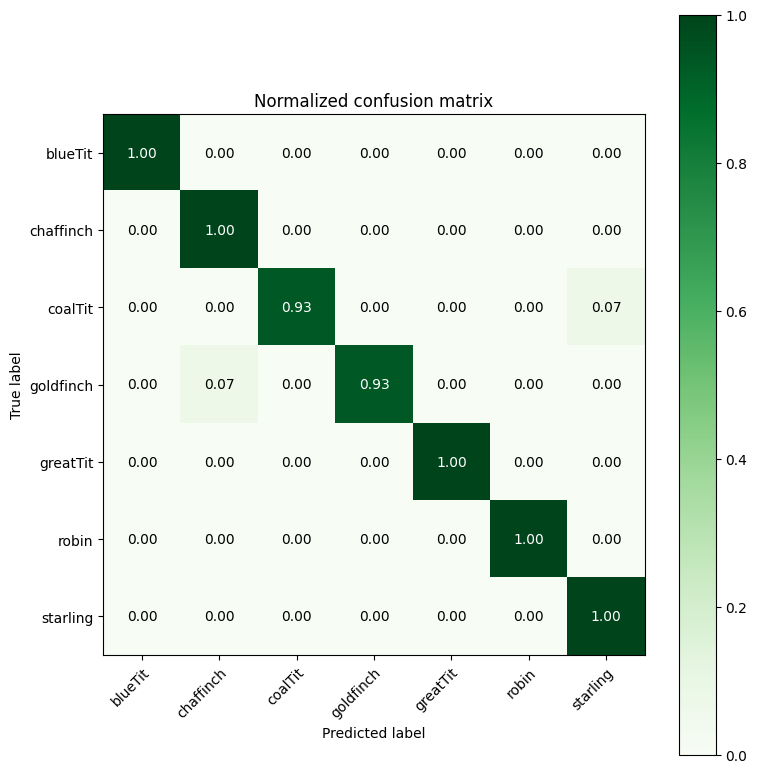

In [11]:
truel, predl = makeAll(dataloader_test, model_aug2, device)
plot_confusion_matrix(truel, predl, class_labels, normalize=True)
print("Accuracy", (np.sum(predl==truel)/predl.size * 100))

In [12]:
class_labels = ['blueTit', 'chaffinch', 'coalTit', 'goldfinch', 'greatTit', 'robin', 'starling']
print(classification_report(truel, predl, target_names=class_labels))

              precision    recall  f1-score   support

     blueTit       1.00      1.00      1.00        15
   chaffinch       0.94      1.00      0.97        15
     coalTit       1.00      0.93      0.97        15
   goldfinch       1.00      0.93      0.97        15
    greatTit       1.00      1.00      1.00        15
       robin       1.00      1.00      1.00        15
    starling       0.94      1.00      0.97        15

    accuracy                           0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105



### On feeder

[[ 894    0    9   20  199    2  954]
 [  76 1163   45   48    0  177 2043]
 [   6    0  520    3   19    7 1291]
 [   4   19    7 1805    0    6  159]
 [ 147    3  126   12  872   18  855]
 [   7   93    0    1    0  130 1197]
 [   2    0    0    0    2    0 2138]]
Accuracy 49.88394455865773


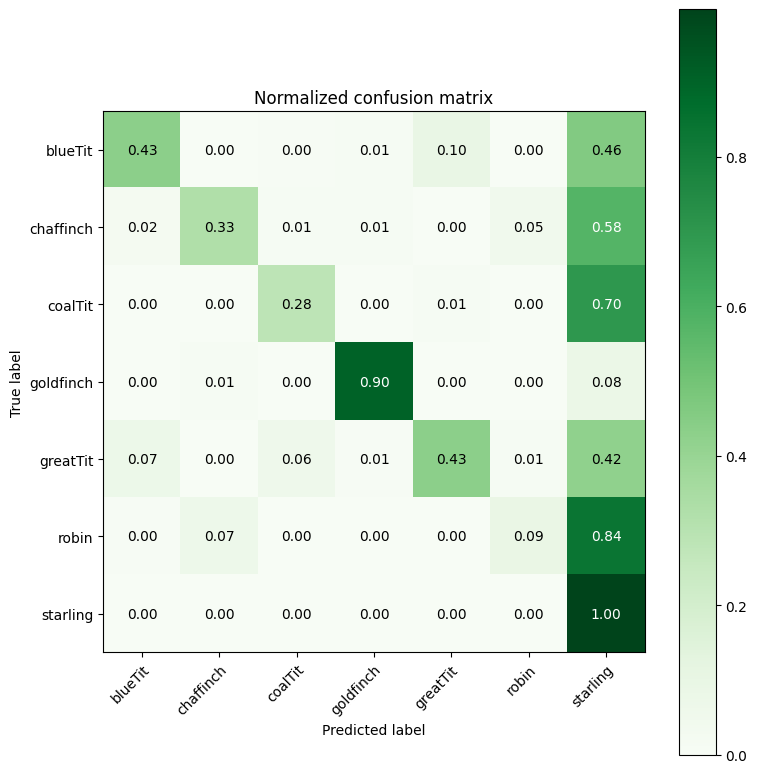

In [13]:
truel, predl = makeAll(dataloader_feeder, model_aug2, device)
plot_confusion_matrix(truel, predl, class_labels, normalize=True)
print("Accuracy", (np.sum(predl==truel)/predl.size * 100))

## Augmentation round 3

Try without jitter

In [ ]:
# Defining the transforms including augmentations (and also the basic ToTensor and normalisation)
preprocess_with_augmentation3 = transforms.Compose([
    transforms.GaussianBlur(kernel_size=(5,5), sigma=(7, 9)), # Added
    transforms.RandomRotation(degrees=10),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomResizedCrop(size=224,scale=(0.3,1)), # lowerbound the scale at 30 % of og img to not get too small portions

    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Datasets and loaders with augmentations added 
dataset_train_aug3 = datasets.ImageFolder(PATH_TRAIN, preprocess_with_augmentation3)
dataloader_train_aug3 = torch.utils.data.DataLoader(dataset_train_aug3, batch_size=8, shuffle=True, num_workers=4)

Load in a fresh ResNet50 that's prepped for transfer learning

In [ ]:
# load "clean" resnet50
untrained_model_aug3 = load_and_prep_resnet50()
optimizer = get_optimizer(untrained_model_aug3) 

### Training
First with the frozen layers, then unfreeze for finetuning

In [ ]:
freezetrained_model_aug3, freeze_aug3_info = train_model(model=untrained_model_aug3, optimizer=optimizer, num_epoch=40, train=dataloader_train_aug3) 

In [ ]:
unfreeze_layers(freezetrained_model_aug3)
model_aug3, model_aug3_info = train_model(model=freezetrained_model_aug3, optimizer=optimizer, num_epoch=40, train=dataloader_train_aug3)

In [ ]:
torch.save({"aug3": model_aug3.state_dict(), "aug3_info": model_aug3_info, "freeze_aug3_info": freeze_aug3_info},"aug3Model_40.tar")

### Round 3 Results

In [ ]:
visualize_model(model_aug3, dataloader_tiny_val, class_labels, device)

In [ ]:
plot_accuracies(model_aug3_info["train_loss"], model_aug3_info["val_loss"], ["Train", "Val"])

In [ ]:
plot_accuracies(model_aug3_info["train_acc"], model_aug3_info["val_acc"], ["Train", "Val"])

In [ ]:
truel, predl = makeAll(dataloader_test, model_aug3, device)
plot_confusion_matrix(truel, predl, class_labels, normalize=True)
print("Accuracy", (np.sum(predl==truel)/predl.size * 100))

In [ ]:
class_labels = ['blueTit', 'chaffinch', 'coalTit', 'goldfinch', 'greatTit', 'robin', 'starling']
print(classification_report(truel, predl, target_names=class_labels))

### On Feeder

In [ ]:
truel, predl = makeAll(dataloader_feeder, model_aug3, device)
plot_confusion_matrix(truel, predl, class_labels, normalize=True)
print("Accuracy", (np.sum(predl==truel)/predl.size * 100))